Enter the year (e.g., 2019): 2019
Enter the month (e.g., 1 for January): 1


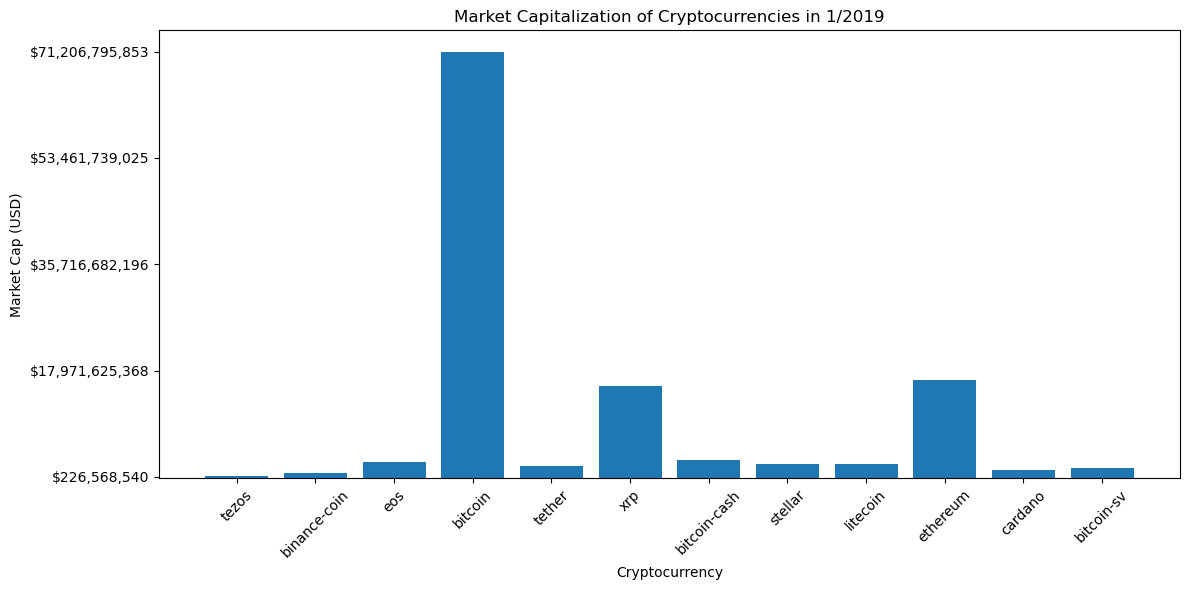

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("consolidated_coin_data.csv")

# User input for month and year
year = int(input("Enter the year (e.g., 2019): "))
month = int(input("Enter the month (e.g., 1 for January): "))

# Filter the data for the specified month and year
data_filtered = data[(pd.to_datetime(data['Date']).dt.year == year) & (pd.to_datetime(data['Date']).dt.month == month)]

# Filter the data for the required cryptocurrencies
cryptocurrencies = ['binance-coin', 'tezos', 'eos', 'bitcoin', 'tether', 'xrp', 'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano', 'bitcoin-sv']
data_filtered = data_filtered[data_filtered['Currency'].isin(cryptocurrencies)]

# Remove commas from Market Cap and convert to numeric
data_filtered['Market Cap'] = data_filtered['Market Cap'].str.replace(',', '').astype(float)

# Determine important values for Y-axis ticks
min_value = data_filtered['Market Cap'].min()
max_value = data_filtered['Market Cap'].max()
medium_value = data_filtered['Market Cap'].median()

# Generate evenly spaced tick locations
tick_locations = np.linspace(min_value, max_value, num=5)

# Plotting the bar chart for market capitalization
plt.figure(figsize=(12, 6))
plt.bar(data_filtered['Currency'], data_filtered['Market Cap'])
plt.title('Market Capitalization of Cryptocurrencies in {}/{}'.format(month, year))
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=45)

# Set Y-axis ticks to display important numbers
plt.yticks(tick_locations, ['${:,.0f}'.format(val) for val in tick_locations])

plt.tight_layout()
plt.show()
